# State Data

We often take data for granted. However, one of the hardest parts about analyzing a problem you're interested in can be to find good data to answer the questions you want to ask. As you're learning R, though, there are many datasets that R has built in that you can take advantage of.

In this problem, we will be examining the "state" dataset, which has data from the 1970s on all fifty US states. For each state, the dataset includes the population, per capita income, illiteracy rate, murder rate, high school graduation rate, average number of frost days, area, latitude and longitude, division the state belongs to, region the state belongs to, and two-letter abbreviation.

<img src="images/all_states_lrg.png"/>

This dataset has 50 observations (one for each US state) and the following 15 variables:


    Population - the population estimate of the state in 1975

    Income - per capita income in 1974

    Illiteracy - illiteracy rates in 1970, as a percent of the population

    Life.Exp - the life expectancy in years of residents of the state in 1970

    Murder - the murder and non-negligent manslaughter rate per 100,000 population in 1976

    HS.Grad - percent of high-school graduates in 1970

    Frost - the mean number of days with minimum temperature below freezing from 1931–1960 in the capital or a large city of the state

    Area - the land area (in square miles) of the state

    state.abb - a 2-letter abreviation for each state

    state.area - the area of each state, in square miles

    x - the longitude of the center of the state

    y - the latitude of the center of the state

    state.division - the division each state belongs to (New England, Middle Atlantic, South Atlantic, East South Central, West South Central, East North Central, West North Central, Mountain, or Pacific)

    state.name - the full names of each state

    state.region - the region each state belong to (Northeast, South, North Central, or West)

### Problem 1.1 - Data Exploration

We begin by exploring the data. Plot all of the states' centers with latitude on the y axis (the "y" variable in our dataset) and longitude on the x axis (the "x" variable in our dataset). The shape of the plot should look like the outline of the United States! Note that Alaska and Hawaii have had their coordinates adjusted to appear just off of the west coast.

In the R command you used to generate this plot, which variable name did you use as the first argument?

In [1]:
data(state)

statedata = cbind(data.frame(state.x77), state.abb, state.area, state.center,  state.division, state.name, state.region)

In [2]:
head(statedata)

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
California,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West
Colorado,2541,4884,0.7,72.06,6.8,63.9,166,103766,CO,104247,-105.5130,38.6777,Mountain,Colorado,West


In [3]:
str(statedata)

'data.frame':	50 obs. of  15 variables:
 $ Population    : num  3615 365 2212 2110 21198 ...
 $ Income        : num  3624 6315 4530 3378 5114 ...
 $ Illiteracy    : num  2.1 1.5 1.8 1.9 1.1 0.7 1.1 0.9 1.3 2 ...
 $ Life.Exp      : num  69 69.3 70.5 70.7 71.7 ...
 $ Murder        : num  15.1 11.3 7.8 10.1 10.3 6.8 3.1 6.2 10.7 13.9 ...
 $ HS.Grad       : num  41.3 66.7 58.1 39.9 62.6 63.9 56 54.6 52.6 40.6 ...
 $ Frost         : num  20 152 15 65 20 166 139 103 11 60 ...
 $ Area          : num  50708 566432 113417 51945 156361 ...
 $ state.abb     : Factor w/ 50 levels "AK","AL","AR",..: 2 1 4 3 5 6 7 8 9 10 ...
 $ state.area    : num  51609 589757 113909 53104 158693 ...
 $ x             : num  -86.8 -127.2 -111.6 -92.3 -119.8 ...
 $ y             : num  32.6 49.2 34.2 34.7 36.5 ...
 $ state.division: Factor w/ 9 levels "New England",..: 4 9 8 5 9 8 1 3 3 3 ...
 $ state.name    : Factor w/ 50 levels "Alabama","Alaska",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ state.region  : Factor w/ 4 levels "

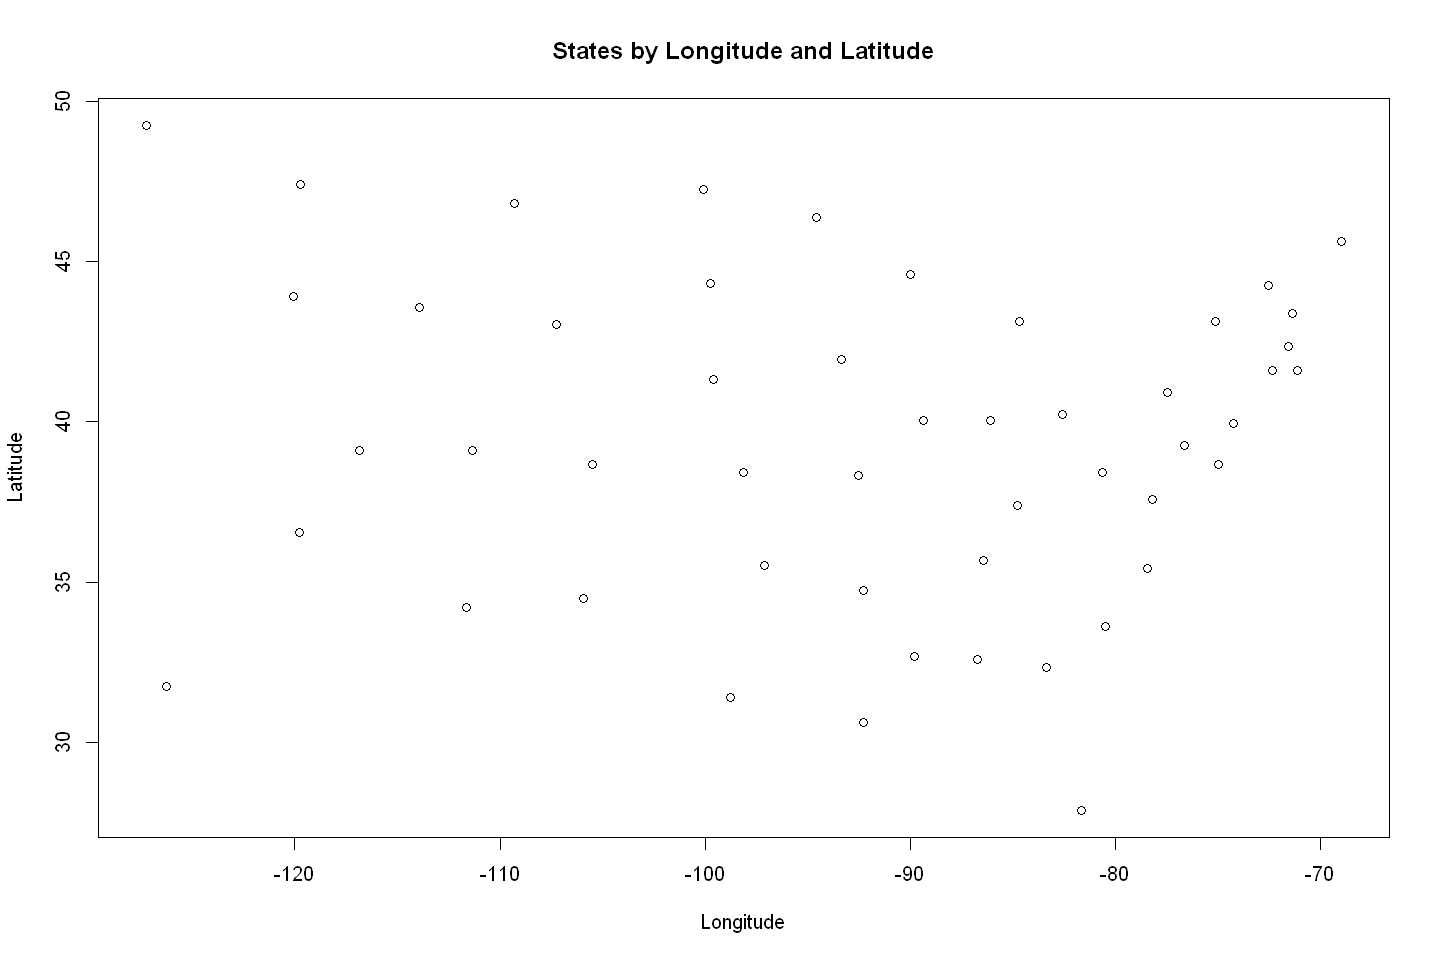

In [4]:
options(repr.plot.width=12, repr.plot.height=8)
plot(statedata$x, statedata$y, main = "States by Longitude and Latitude",xlab='Longitude',ylab='Latitude')

### Problem 1.2 - Data Exploration

Using the tapply command, determine which region of the US (West, North Central, South, or Northeast) has the highest average high school graduation rate of all the states in the region:

In [5]:
tapply(statedata$HS.Grad, statedata$state.region, mean)

Northeast         South North Central          West 
     53.96667      44.34375      54.51667      62.00000

Answer: West

### Problem 1.3 - Data Exploration

Now, make a boxplot of the murder rate by region (for more information about creating boxplots in R, type ?boxplot in your console).

Which region has the highest median murder rate?

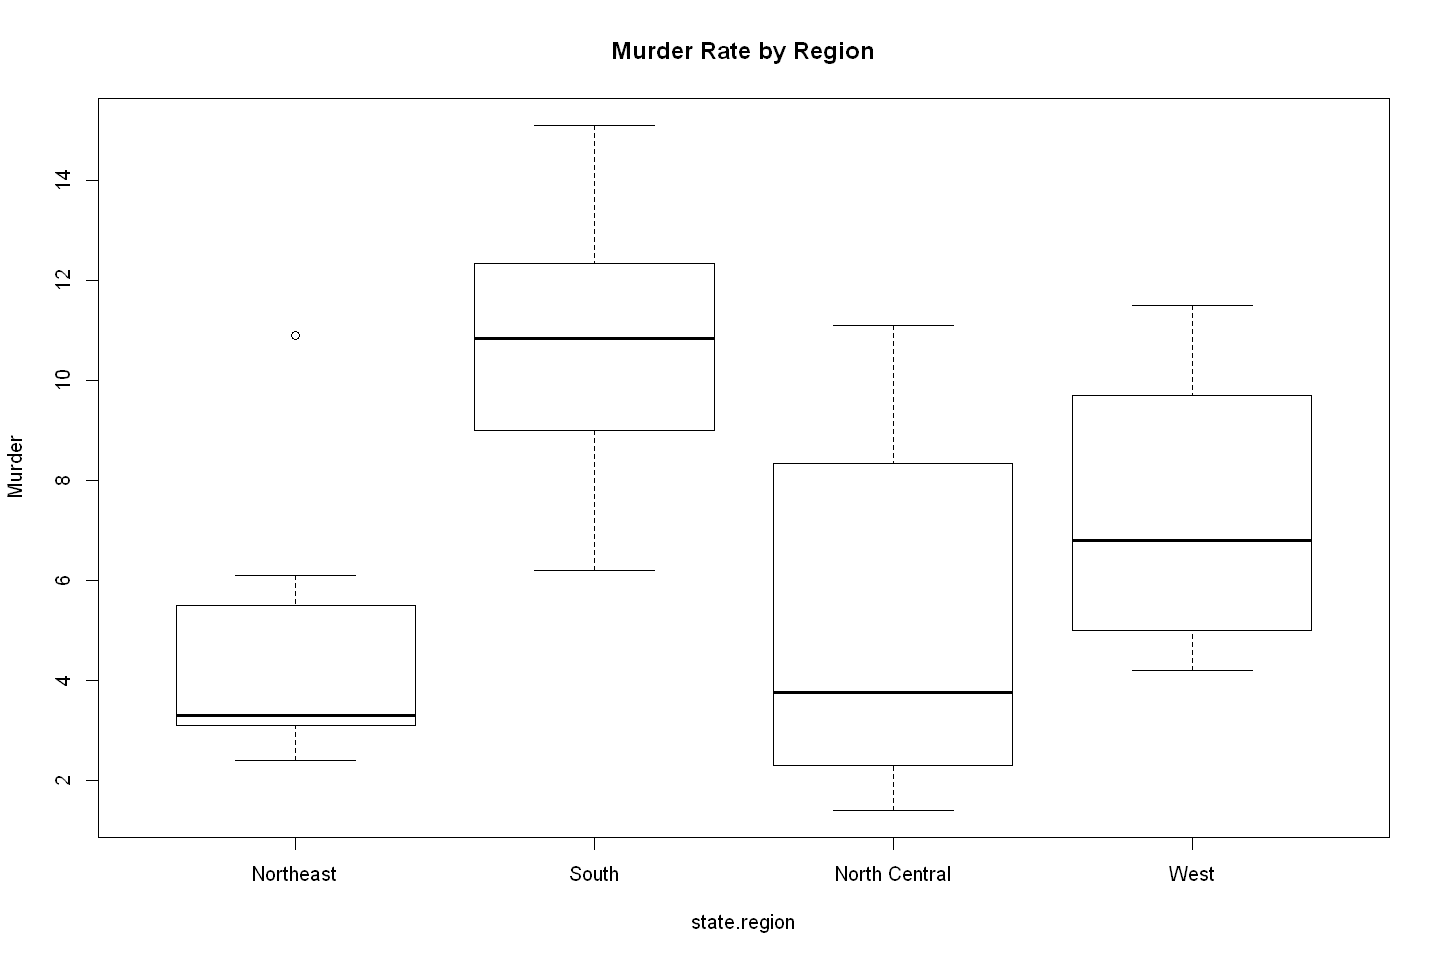

In [6]:
boxplot(Murder ~ state.region, statedata, main = "Murder Rate by Region")

Answer: South

### Problem 1.4 - Data Exploration

You should see that there is an outlier in the Northeast region of the boxplot you just generated. Which state does this correspond to? (Hint: There are many ways to find the answer to this question, but one way is to use the subset command to only look at the Northeast data.)

In [7]:
t = subset(statedata, state.region=='Northeast')
tail(t[with(t, order(Murder)), ])

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
Massachusetts,5814,4755,1.1,71.83,3.3,58.5,103,7826,MA,8257,-71.5800,42.3645,New England,Massachusetts,Northeast
New Hampshire,812,4281,0.7,71.23,3.3,57.6,174,9027,NH,9304,-71.3924,43.3934,New England,New Hampshire,Northeast
New Jersey,7333,5237,1.1,70.93,5.2,52.5,115,7521,NJ,7836,-74.2336,39.9637,Middle Atlantic,New Jersey,Northeast
Vermont,472,3907,0.6,71.64,5.5,57.1,168,9267,VT,9609,-72.5450,44.2508,New England,Vermont,Northeast
Pennsylvania,11860,4449,1.0,70.43,6.1,50.2,126,44966,PA,45333,-77.4500,40.9069,Middle Atlantic,Pennsylvania,Northeast
New York,18076,4903,1.4,70.55,10.9,52.7,82,47831,NY,49576,-75.1449,43.1361,Middle Atlantic,New York,Northeast


Answer: New York

### Problem 2.1 - Predicting Life Expectancy - An Initial Model

We would like to build a model to predict life expectancy by state using the state statistics we have in our dataset.

Build the model with all potential variables included (Population, Income, Illiteracy, Murder, HS.Grad, Frost, and Area). Note that you should use the variable "Area" in your model, NOT the variable "state.area".

What is the coefficient for "Income" in your linear regression model?

In [8]:
model = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata)
summary(model)


Call:
lm(formula = Life.Exp ~ Population + Income + Illiteracy + Murder + 
    HS.Grad + Frost + Area, data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48895 -0.51232 -0.02747  0.57002  1.49447 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.094e+01  1.748e+00  40.586  < 2e-16 ***
Population   5.180e-05  2.919e-05   1.775   0.0832 .  
Income      -2.180e-05  2.444e-04  -0.089   0.9293    
Illiteracy   3.382e-02  3.663e-01   0.092   0.9269    
Murder      -3.011e-01  4.662e-02  -6.459 8.68e-08 ***
HS.Grad      4.893e-02  2.332e-02   2.098   0.0420 *  
Frost       -5.735e-03  3.143e-03  -1.825   0.0752 .  
Area        -7.383e-08  1.668e-06  -0.044   0.9649    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7448 on 42 degrees of freedom
Multiple R-squared:  0.7362,	Adjusted R-squared:  0.6922 
F-statistic: 16.74 on 7 and 42 DF,  p-value: 2.534e-10


Answer: -2.180e-05

### Problem 2.2 - Predicting Life Expectancy - An Initial Model

Call the coefficient for income x (the answer to Problem 2.1). What is the interpretation of the coefficient x?

Answer: The income coefficient is inversely proportional for the life expectancy.

### Problem 2.3 - Predicting Life Expectancy - An Initial Model

Now plot a graph of life expectancy vs. income using the command:

    plot(statedata$Income, statedata$Life.Exp)

Visually observe the plot. What appears to be the relationship?

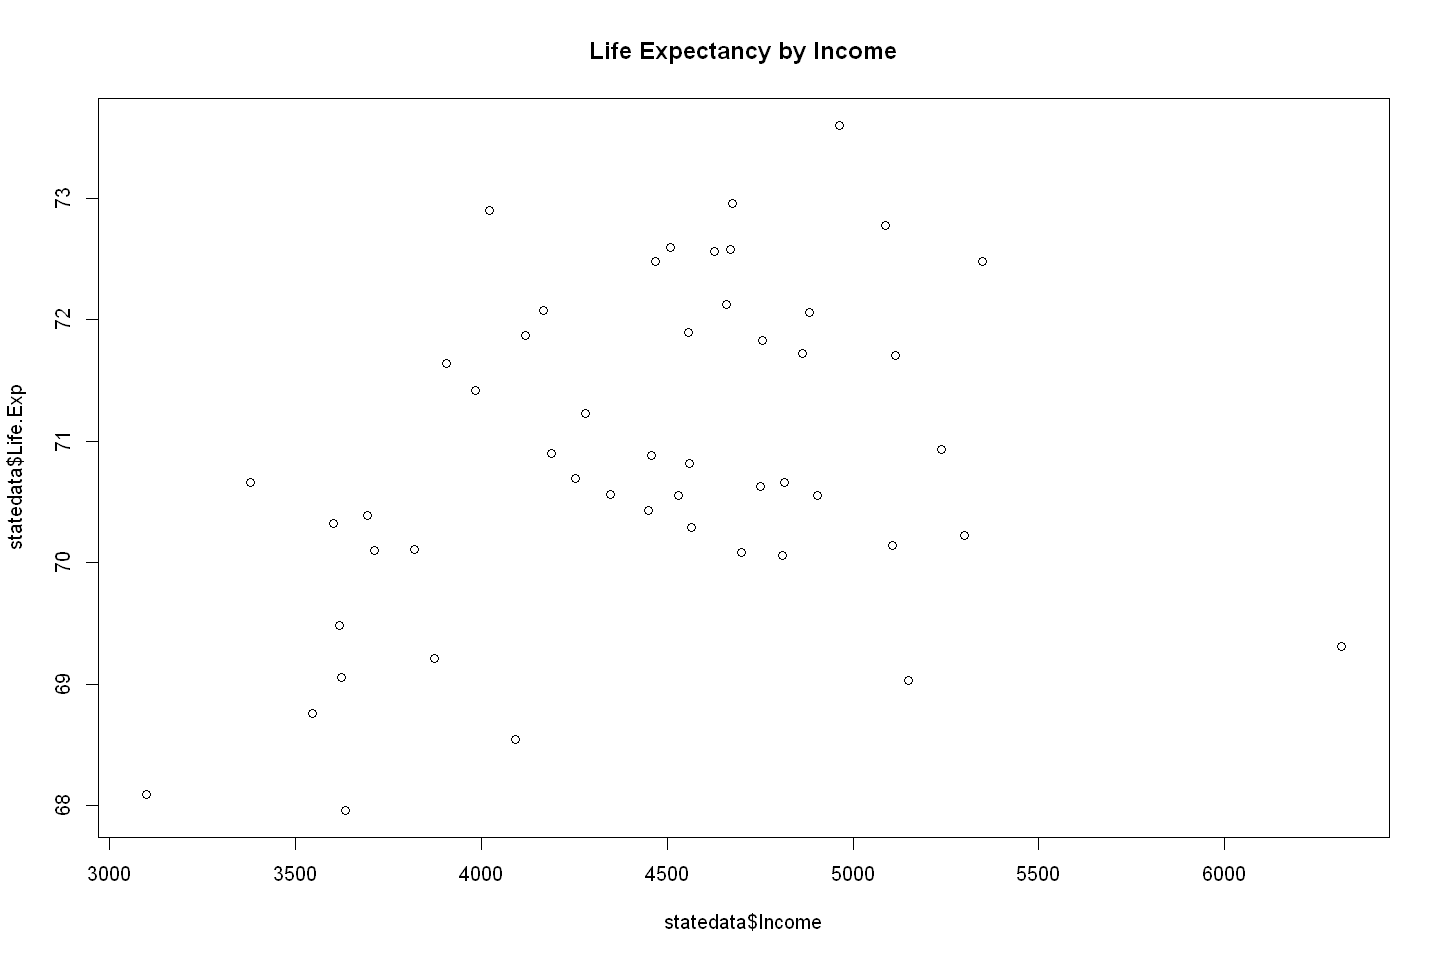

In [9]:
plot(statedata$Income, statedata$Life.Exp, main = "Life Expectancy by Income")

Answer: Visually, there is no correlation between "Income" and "Life Expectation".

### Problem 2.4 - Predicting Life Expectancy - An Initial Model

The model we built does not display the relationship we saw from the plot of life expectancy vs. income. Which of the following explanations seems the most reasonable?


Answer: Multicollinearity

### Problem 3.1 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions

Recall that we discussed the principle of simplicity: that is, a model with fewer variables is preferable to a model with many unnnecessary variables. Experiment with removing independent variables from the original model. Remember to use the significance of the coefficients to decide which variables to remove (remove the one with the largest "p-value" first, or the one with the "t value" closest to zero), and to remove them one at a time (this is called "backwards variable selection"). This is important due to multicollinearity issues - removing one insignificant variable may make another previously insignificant variable become significant.

You should be able to find a good model with only 4 independent variables, instead of the original 7. Which variables does this model contain?


In [10]:
model2 = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost, data=statedata)
summary(model2)


Call:
lm(formula = Life.Exp ~ Population + Income + Illiteracy + Murder + 
    HS.Grad + Frost, data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49047 -0.52533 -0.02546  0.57160  1.50374 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.099e+01  1.387e+00  51.165  < 2e-16 ***
Population   5.188e-05  2.879e-05   1.802   0.0785 .  
Income      -2.444e-05  2.343e-04  -0.104   0.9174    
Illiteracy   2.846e-02  3.416e-01   0.083   0.9340    
Murder      -3.018e-01  4.334e-02  -6.963 1.45e-08 ***
HS.Grad      4.847e-02  2.067e-02   2.345   0.0237 *  
Frost       -5.776e-03  2.970e-03  -1.945   0.0584 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7361 on 43 degrees of freedom
Multiple R-squared:  0.7361,	Adjusted R-squared:  0.6993 
F-statistic: 19.99 on 6 and 43 DF,  p-value: 5.362e-11


model = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata) -> Adjusted R-squared:  0.6922

model2 = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost, data=statedata) -> Adjusted R-squared:  0.6993 **(Better!)**

In [11]:
model3 = lm(Life.Exp ~ Population + Income + Murder + HS.Grad + Frost, data=statedata)
summary(model3)


Call:
lm(formula = Life.Exp ~ Population + Income + Murder + HS.Grad + 
    Frost, data = statedata)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.4892 -0.5122 -0.0329  0.5645  1.5166 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.107e+01  1.029e+00  69.067  < 2e-16 ***
Population   5.115e-05  2.709e-05   1.888   0.0657 .  
Income      -2.477e-05  2.316e-04  -0.107   0.9153    
Murder      -3.000e-01  3.704e-02  -8.099 2.91e-10 ***
HS.Grad      4.776e-02  1.859e-02   2.569   0.0137 *  
Frost       -5.910e-03  2.468e-03  -2.395   0.0210 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7277 on 44 degrees of freedom
Multiple R-squared:  0.7361,	Adjusted R-squared:  0.7061 
F-statistic: 24.55 on 5 and 44 DF,  p-value: 1.019e-11


model = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata) -> Adjusted R-squared: 0.6922

model2 = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost, data=statedata) -> Adjusted R-squared: 0.6993

model3 = lm(Life.Exp ~ Population + Income + Murder + HS.Grad + Frost, data=statedata) -> Adjusted R-squared: 0.7061 **(Better!)**

In [12]:
model4 = lm(Life.Exp ~ Population + Murder + HS.Grad + Frost, data=statedata)
summary(model4)


Call:
lm(formula = Life.Exp ~ Population + Murder + HS.Grad + Frost, 
    data = statedata)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.47095 -0.53464 -0.03701  0.57621  1.50683 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.103e+01  9.529e-01  74.542  < 2e-16 ***
Population   5.014e-05  2.512e-05   1.996  0.05201 .  
Murder      -3.001e-01  3.661e-02  -8.199 1.77e-10 ***
HS.Grad      4.658e-02  1.483e-02   3.142  0.00297 ** 
Frost       -5.943e-03  2.421e-03  -2.455  0.01802 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7197 on 45 degrees of freedom
Multiple R-squared:  0.736,	Adjusted R-squared:  0.7126 
F-statistic: 31.37 on 4 and 45 DF,  p-value: 1.696e-12


model = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost + Area, data=statedata) -> Adjusted R-squared: 0.6922

model2 = lm(Life.Exp ~ Population + Income + Illiteracy + Murder + HS.Grad + Frost, data=statedata) -> Adjusted R-squared: 0.6993

model3 = lm(Life.Exp ~ Population + Income + Murder + HS.Grad + Frost, data=statedata) -> Adjusted R-squared: 0.7061

model4 = lm(Life.Exp ~ Population + Murder + HS.Grad + Frost, data=statedata) -> Adjusted R-squared: 0.7126 **(Better!)**

### Problem 3.2 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions

Removing insignificant variables changes the Multiple R-squared value of the model. By looking at the summary output for both the initial model (all independent variables) and the simplified model (only 4 independent variables) and using what you learned in class, which of the following correctly explains the change in the Multiple R-squared value?

Answer: A simplified model (less variables) only with high correlation is always a better choice for a model.

### Problem 3.3 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions

Using the simplified 4 variable model that we created, we'll now take a look at how our predictions compare to the actual values.

Take a look at the vector of predictions by using the predict function (since we are just looking at predictions on the training set, you don't need to pass a "newdata" argument to the predict function).

Which state do we predict to have the lowest life expectancy? (Hint: use the sort function)

In [13]:
tail(sort(predict(model4)))

Nebraska     Minnesota          Iowa        Oregon Massachusetts 
     72.17032      72.26560      72.39653      72.41445      72.44105 
   Washington 
     72.68272

Which state actually has the lowest life expectancy? (Hint: use the which.min function)

In [14]:
statedata[which.min(statedata$Life.Exp), ]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
South Carolina,2816,3635,2.3,67.96,11.6,37.8,65,30225,SC,31055,-80.5056,33.619,South Atlantic,South Carolina,South


### Problem 3.4 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions

Which state do we predict to have the highest life expectancy?

In [15]:
tail(sort(predict(model4)))

Nebraska     Minnesota          Iowa        Oregon Massachusetts 
     72.17032      72.26560      72.39653      72.41445      72.44105 
   Washington 
     72.68272

Which state actually has the highest life expectancy?

In [16]:
statedata[which.max(statedata$Life.Exp), ]

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
Hawaii,868,4963,1.9,73.6,6.2,61.9,0,6425,HI,6450,-126.25,31.75,Pacific,Hawaii,West


### Problem 3.5 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions

Take a look at the vector of residuals (the difference between the predicted and actual values).

For which state do we make the smallest absolute error?

In [17]:
which.min(abs(model$residuals))

Indiana 
     14

For which state do we make the largest absolute error?

In [18]:
which.max(abs(model$residuals))

Hawaii 
    11